In [71]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import shutil

In [72]:
DIR = os.getcwd()

DATA = os.path.join(DIR, 'data')

IMG_PATH = os.path.join(DATA, 'bee_imgs')

print(IMG_PATH)

/home/matthew/Documents/GitHub/bees/data/bee_imgs


In [73]:
data = pd.read_csv(os.path.join(DATA, 'bee_data.csv'))

In [74]:
#print(data)

health_hash = {}

counter = 0
for i in data.health.unique():
    health_hash[i] = counter
    counter += 1

print(health_hash)
    
print(data[['file', 'health']])

{'hive being robbed': 0, 'healthy': 1, 'few varrao, hive beetles': 2, 'ant problems': 3, 'missing queen': 4, 'Varroa, Small Hive Beetles': 5}
             file             health
0     041_066.png  hive being robbed
1     041_072.png  hive being robbed
2     041_073.png  hive being robbed
3     041_067.png  hive being robbed
4     041_059.png  hive being robbed
...           ...                ...
5167  027_011.png            healthy
5168  027_007.png            healthy
5169  027_013.png            healthy
5170  027_012.png            healthy
5171  027_014.png            healthy

[5172 rows x 2 columns]


In [75]:
#print(list(data['health'].values))

y = [health_hash[x] for x in list(data['health'].values) if type(x) is str]

len(data.columns)

data.insert(len(data.columns)-1, "health_hash", y)

print(data)

             file     date   time           location  zip code subspecies  \
0     041_066.png  8/28/18  16:07     Alvin, TX, USA     77511         -1   
1     041_072.png  8/28/18  16:07     Alvin, TX, USA     77511         -1   
2     041_073.png  8/28/18  16:07     Alvin, TX, USA     77511         -1   
3     041_067.png  8/28/18  16:07     Alvin, TX, USA     77511         -1   
4     041_059.png  8/28/18  16:07     Alvin, TX, USA     77511         -1   
...           ...      ...    ...                ...       ...        ...   
5167  027_011.png  8/20/18  10:03  San Jose, CA, USA     95124         -1   
5168  027_007.png  8/20/18  10:03  San Jose, CA, USA     95124         -1   
5169  027_013.png  8/20/18  10:03  San Jose, CA, USA     95124         -1   
5170  027_012.png  8/20/18  10:03  San Jose, CA, USA     95124         -1   
5171  027_014.png  8/20/18  10:03  San Jose, CA, USA     95124         -1   

                 health  pollen_carrying  health_hash   caste  
0     hive 

In [76]:
healthy_counter = 0
distressed_counter = 0

train_dir = os.path.join(IMG_PATH, 'train')
validation_dir = os.path.join(IMG_PATH, 'validation')

print(os.path.join(validation_dir, 'distressed'))

#for index, row in data.iterrows():
    #print(row['file'], row['health_hash'])
    #if(row['health_hash'] != 1):
        #if (distressed_counter % 5 == 0):
            #shutil.copy(os.path.join(IMG_PATH, row['file']), os.path.join(os.path.join(validation_dir, 'distressed'), row['file']))
        #else:
            #shutil.copy(os.path.join(IMG_PATH, row['file']), os.path.join(os.path.join(train_dir, 'distressed'), row['file']))
        #distressed_counter += 1
        #print(distressed_counter)
    #else:
        #if (healthy_counter % 5 == 0):
            #shutil.copy(os.path.join(IMG_PATH, row['file']), os.path.join(os.path.join(validation_dir, 'healthy'), row['file']))
        #else:
            #shutil.copy(os.path.join(IMG_PATH, row['file']), os.path.join(os.path.join(train_dir, 'healthy'), row['file']))
        #healthy_counter += 1
        #print(healthy_counter)


/home/matthew/Documents/GitHub/bees/data/bee_imgs/validation/distressed


In [77]:
train_healthy_dir = os.path.join(train_dir, 'healthy')  # directory with our training cat pictures
train_distressed_dir = os.path.join(train_dir, 'distressed')  # directory with our training dog pictures
validation_healthy_dir = os.path.join(validation_dir, 'healthy')  # directory with our validation cat pictures
validation_distressed_dir = os.path.join(validation_dir, 'distressed')  # directory with our validation dog pictures

num_hea_tr = len(os.listdir(train_healthy_dir))
num_dis_tr = len(os.listdir(train_distressed_dir))
num_hea_val = len(os.listdir(validation_healthy_dir))
num_dis_val = len(os.listdir(validation_distressed_dir))

total_train = num_dis_tr + num_hea_tr
total_val = num_dis_val + num_hea_val

print(total_train)
print(total_val)

print(validation_distressed_dir)

4137
1035
/home/matthew/Documents/GitHub/bees/data/bee_imgs/validation/distressed


In [78]:
batch_size = 128
epochs = 11
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [79]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [80]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')


Found 4137 images belonging to 2 classes.


In [81]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1035 images belonging to 2 classes.


In [82]:
sample_training_images, _ = next(train_data_gen)


In [83]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [84]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


In [85]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')


Found 4137 images belonging to 2 classes.


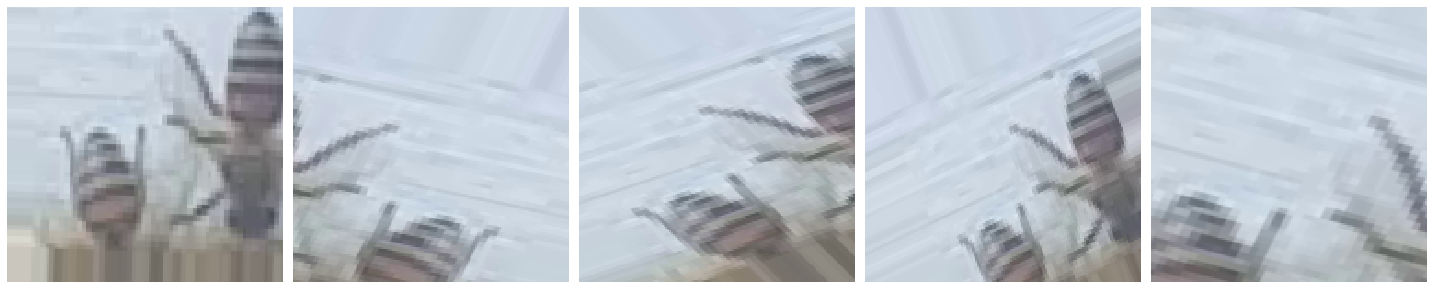

In [86]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


In [87]:
image_gen_val = ImageDataGenerator(rescale=1./255)


In [88]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')


Found 1035 images belonging to 2 classes.


In [89]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [90]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)       

In [91]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/30
32/32 [==============================] - 64s 2s/step - loss: 0.9764 - acc: 0.6031 - val_loss: 0.6162 - val_acc: 0.6543
Epoch 2/30
32/32 [==============================] - 64s 2s/step - loss: 0.5619 - acc: 0.6667 - val_loss: 0.6982 - val_acc: 0.6689
Epoch 3/30
32/32 [==============================] - 63s 2s/step - loss: 0.4828 - acc: 0.7847 - val_loss: 0.4295 - val_acc: 0.7949
Epoch 4/30
32/32 [==============================] - 66s 2s/step - loss: 0.3558 - acc: 0.8516 - val_loss: 0.5562 - val_acc: 0.7275
Epoch 5/30
32/32 [==============================] - 64s 2s/step - loss: 0.3456 - acc: 0.8493 - val_loss: 0.3297 - val_acc: 0.8223
Epoch 6/30
32/32 [==============================] - 63s 2s/step - loss: 0.2887 - acc: 0.8718 - val_loss: 0.2663 - val_acc: 0.8945
Epoch 7/30
32/32 [==============================] - 67s 2s/step - loss: 0.2746 - acc: 0.8882 - val_loss: 0.3140 - val_acc: 0.8525
Epoch 8/30
32/32 [==============================] - 63s 2s/step - loss: 0.2845 - acc: 0.87

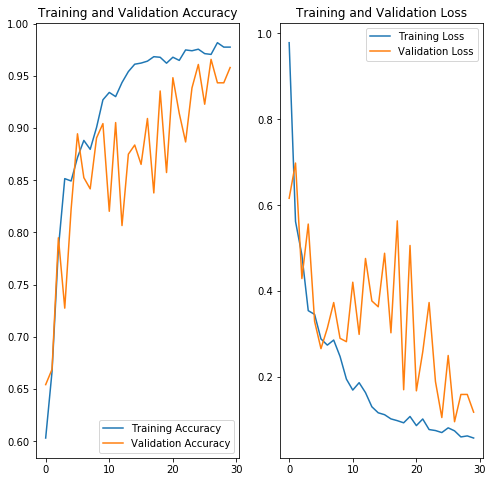

In [92]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


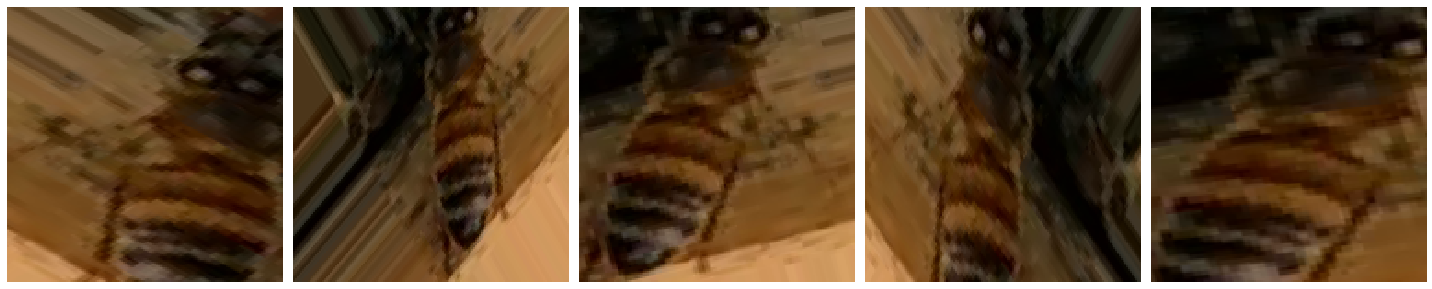

In [93]:
nero = [train_data_gen[0][0][0] for i in range(5)]
#print(nero)
plotImages(nero)


In [94]:
giga = model_new.predict(val_data_gen)

In [95]:
print(giga)

[[0.00700009]
 [0.99729407]
 [0.9779873 ]
 ...
 [0.99969256]
 [0.9933428 ]
 [0.003633  ]]


In [97]:
model_json = model_new.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_new.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [98]:
model_new.save("kerasmodel.h5")
print("Saved model to disk")

Saved model to disk
